# Forecasting Stock Trends for The Coca-Cola Company (KO)

I use long short-term memory (LSTM) Neural Networks for time-series forecasting of the stock price for The Coca Cola Company based on 5 years of historical data from 2015-2020. Data Source: Yahoo Finance. 

<div>
   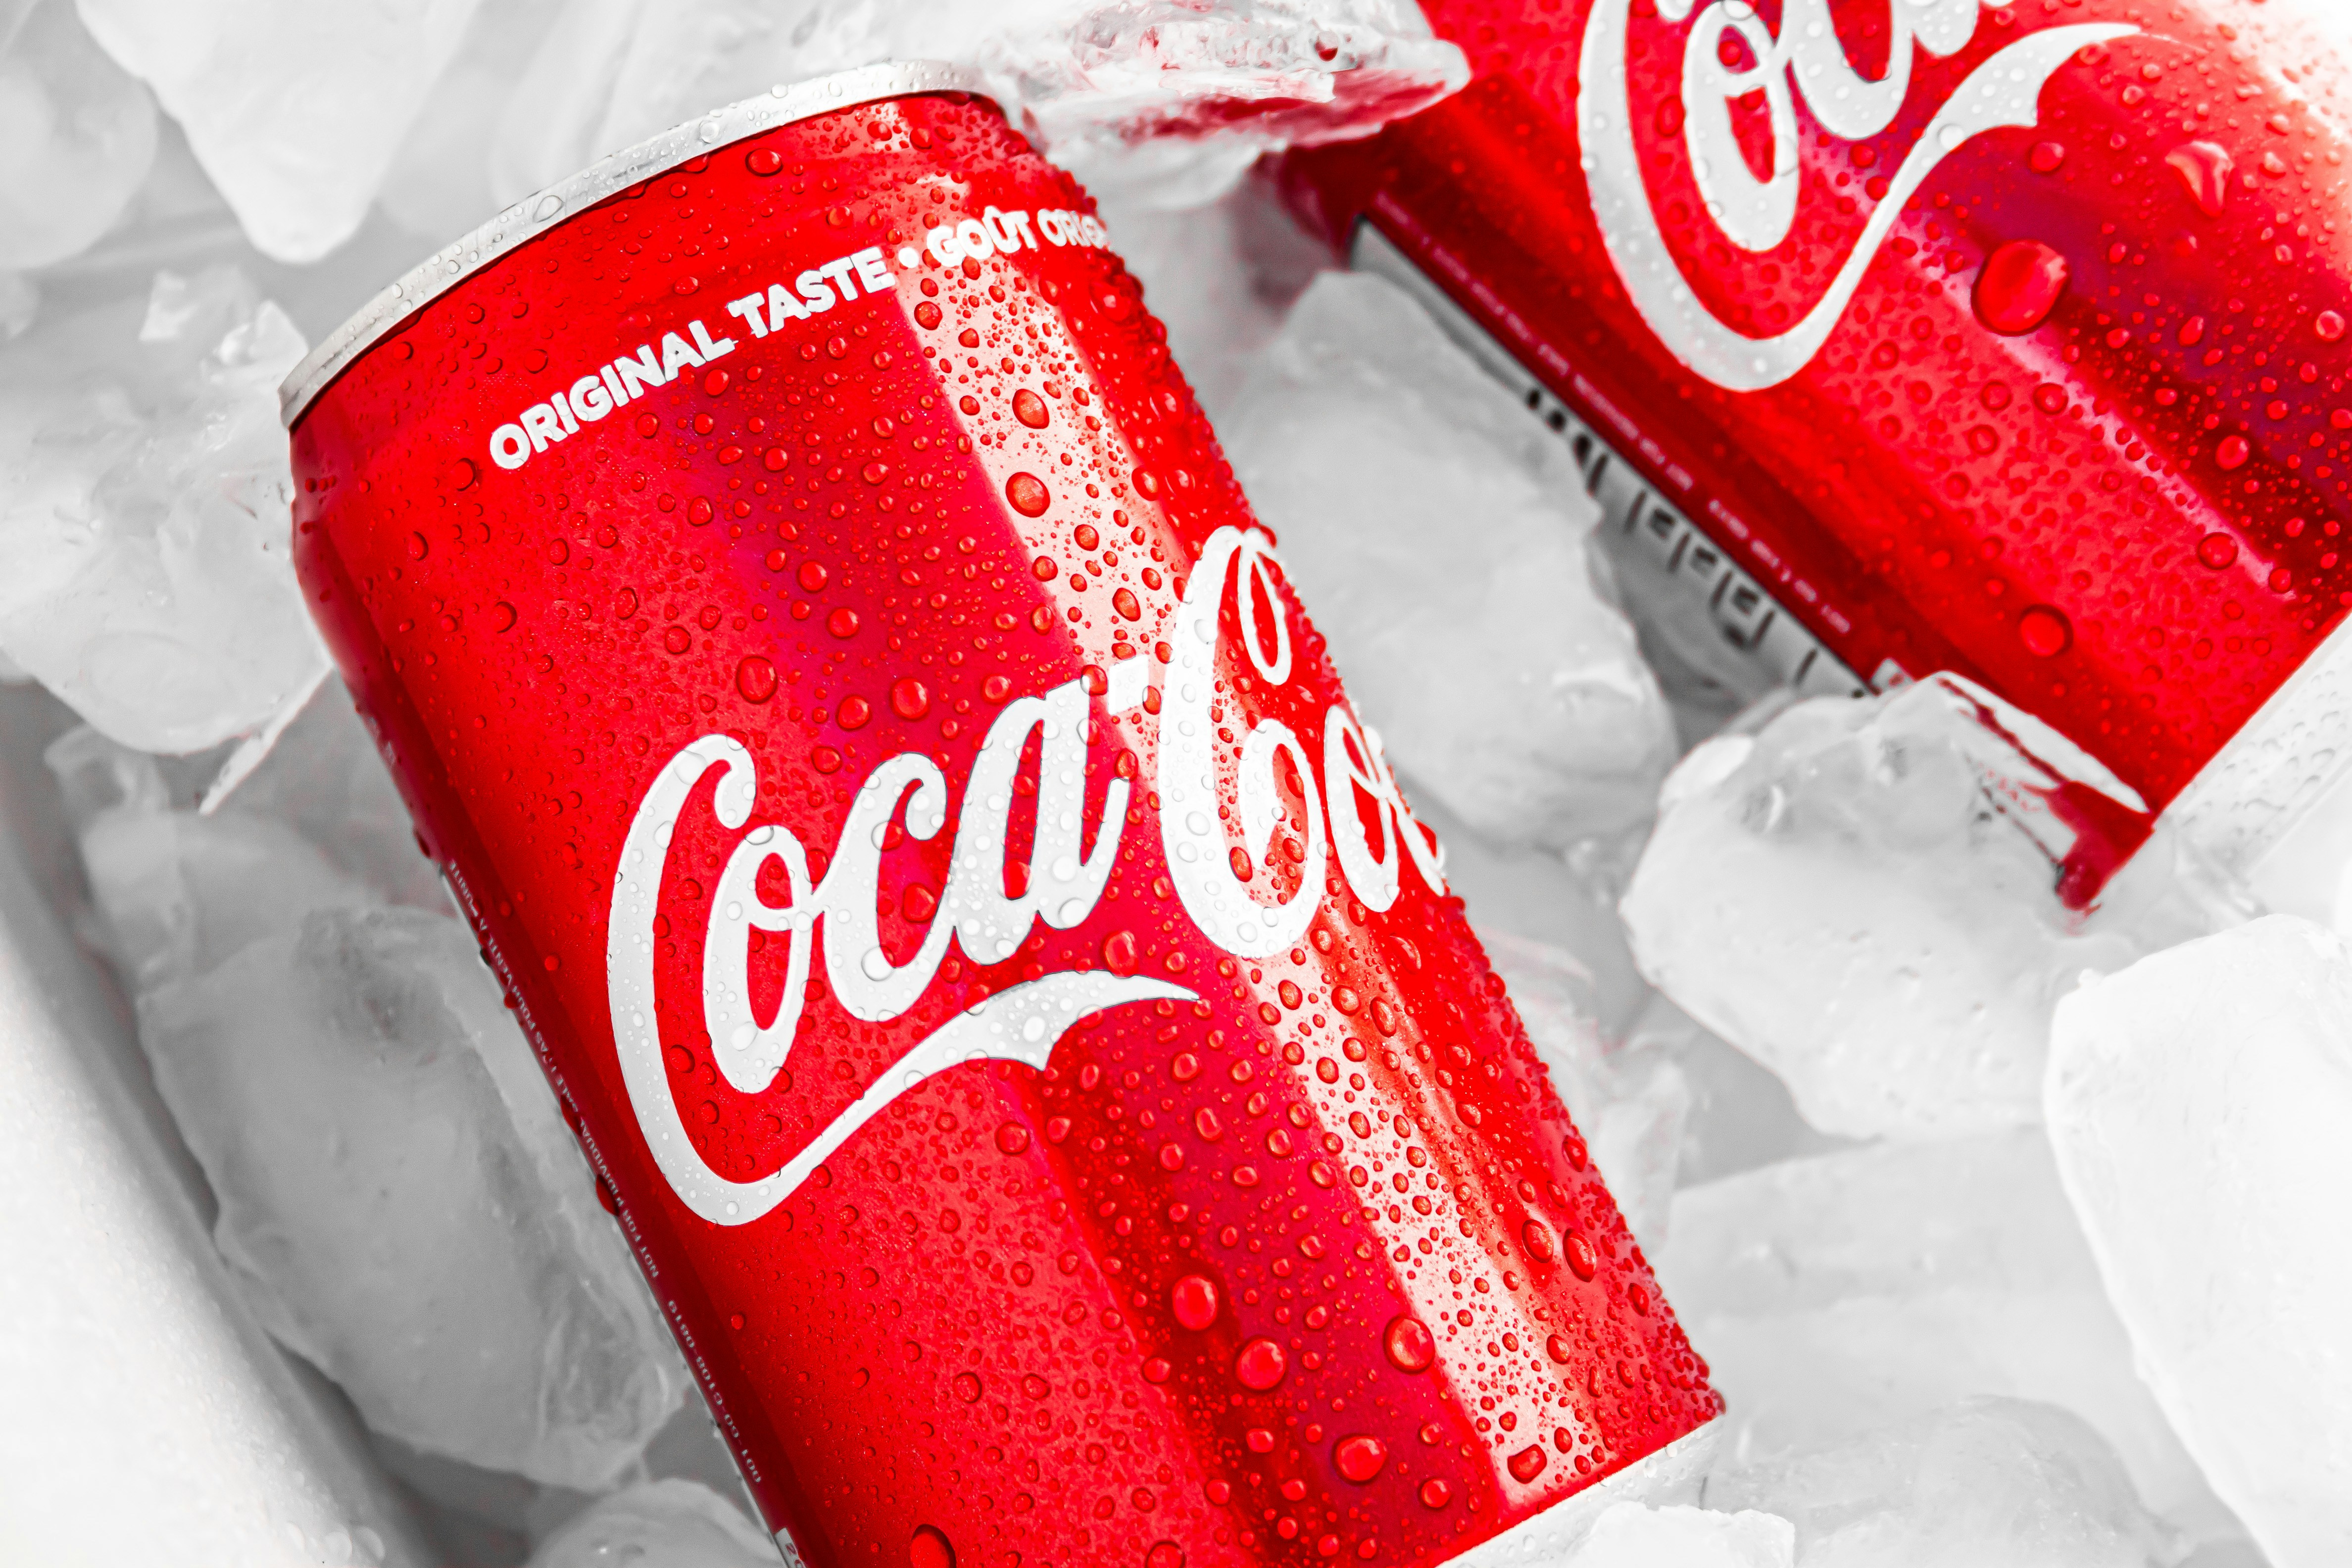
</div>

The Coca-Cola Company is a beverage corporation that produces, advertises, and distributes a variety of nonalcoholic drinks globally.

In [7]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [8]:
# Import dataset
dataset = pd.read_csv("KO_5years.csv")

In [10]:
#Have a look at the data (First five rows shown)
dataset.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  2015-01-02  42.259998  42.400002  41.799999  42.139999  31.598587   9921100
1  2015-01-05  42.689999  42.970001  42.080002  42.139999  31.598587  26292600
2  2015-01-06  42.410000  42.939999  42.240002  42.459999  31.838535  16897500
3  2015-01-07  42.799999  43.110001  42.580002  42.990002  32.235958  13412300
4  2015-01-08  43.180000  43.570000  43.099998  43.509998  32.625889  21743600

In [9]:
#check if there are null values
dataset.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

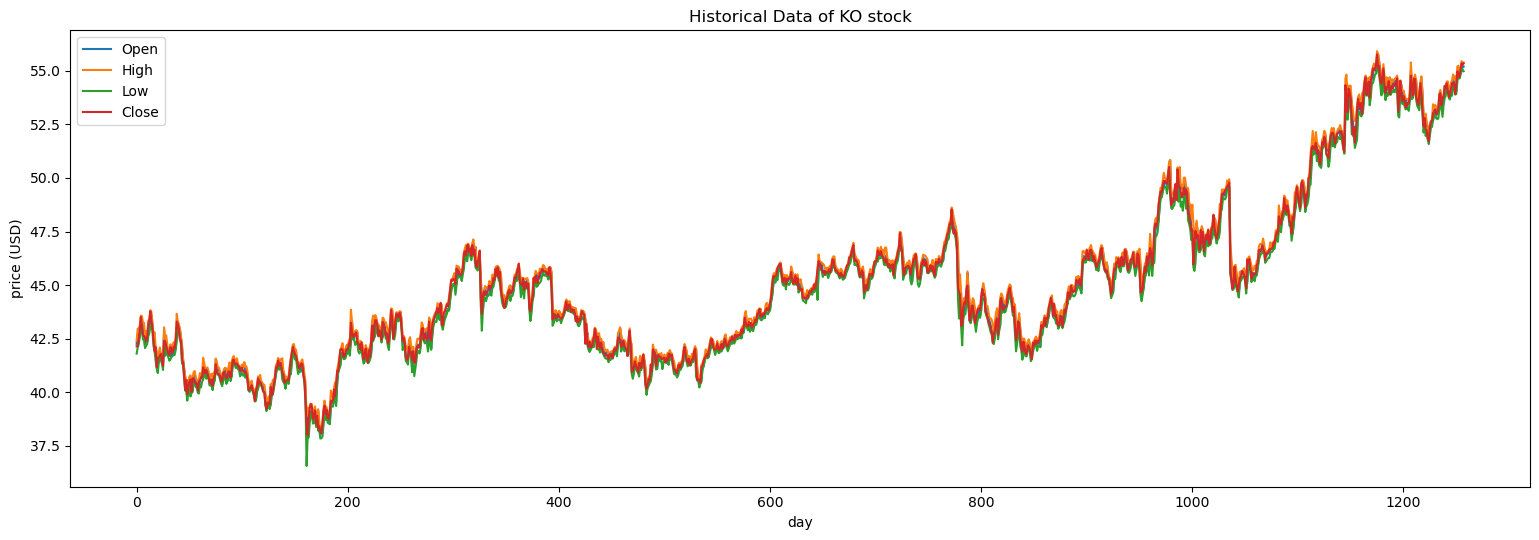

In [21]:
#plot to assess variation in sotck prices
plt.rcParams["figure.figsize"] = [15.50, 5.50]
plt.rcParams["figure.autolayout"] = True
plt.figure()
plt.plot(dataset["Open"])
plt.plot(dataset["High"])
plt.plot(dataset["Low"])
plt.plot(dataset["Close"])
plt.title('Historical Data of KO stock')
plt.ylabel('Price (USD)')
plt.xlabel('Day')
plt.legend(['Open','High','Low','Close'], loc='upper left')

plt.show()

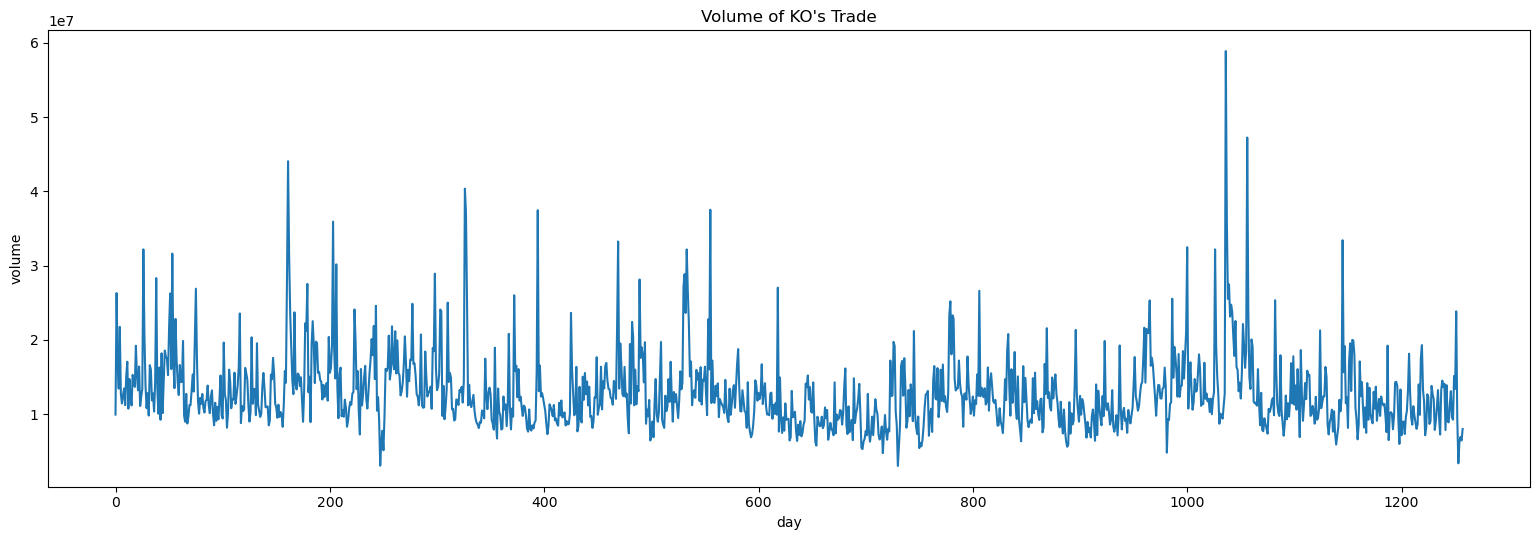

In [23]:
#plot to asses number of shares traded of that stock (not dollar amount). Total Trade Quantity (TTQ)
plt.figure()
plt.plot(dataset["Volume"])
plt.title("Volume of KO's Trade")
plt.ylabel('Volume')
plt.xlabel('Day')
plt.show()

In [25]:
#Split training and testing dataset
df_train, df_test = train_test_split(dataset, train_size=0.8, test_size=0.2, shuffle=False)
train_set = df_train.iloc[:,1:2].values

In [26]:
#Feature scaling
scaler= MinMaxScaler(feature_range = (0,1))
scaled_train= scaler.fit_transform(train_set)

In [27]:
#For 60 timesteps = Network will see 2 months of data, and 1 output
X_train=[]
y_train=[]
for i in range (60, 1005):
    X_train.append(scaled_train[i-60:i, 0])
    y_train.append(scaled_train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [28]:
# reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [29]:
#Initializes neural net
regressor = Sequential()

In [30]:
# Adds the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [31]:
# Adds a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [32]:
# Adds a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [33]:
# Adds a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [34]:
# Adds the output layer
regressor.add(Dense(units = 1))

In [36]:
# Compiles the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [37]:
# Fits the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 14s 88ms/step - loss: 0.0455
Epoch 2/100
30/30 [==============================] - 3s 91ms/step - loss: 0.0104
Epoch 3/100
30/30 [==============================] - 3s 110ms/step - loss: 0.0092
Epoch 4/100
30/30 [==============================] - 5s 156ms/step - loss: 0.0088
Epoch 5/100
30/30 [==============================] - 5s 156ms/step - loss: 0.0086
Epoch 6/100
30/30 [==============================] - 3s 106ms/step - loss: 0.0076
Epoch 7/100
30/30 [==============================] - 3s 108ms/step - loss: 0.0072
Epoch 8/100
30/30 [==============================] - 4s 123ms/step - loss: 0.0082
Epoch 9/100
30/30 [==============================] - 3s 106ms/step - loss: 0.0073
Epoch 10/100
30/30 [==============================] - 4s 126ms/step - loss: 0.0069
Epoch 11/100
30/30 [==============================] - 3s 108ms/step - loss: 0.0069
Epoch 12/100
30/30 [==============================] - 5s 162ms/step - loss: 0.0067
Epoch 13/100
3

30/30 [==============================] - 4s 132ms/step - loss: 0.0018


In [38]:
#Concatenate the training and testing set
dataset_total = pd.concat((df_train['Open'], df_test['Open']), axis = 0)

In [39]:
#use a tme step of 60
inputs = dataset_total[len(dataset_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1) #reshape
inputs = scaler.transform(inputs) #scale new dataset


In [40]:
#Gets prediction
X_test = []
for i in range(60, 311):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

8/8 [==============================] - 4s 27ms/step


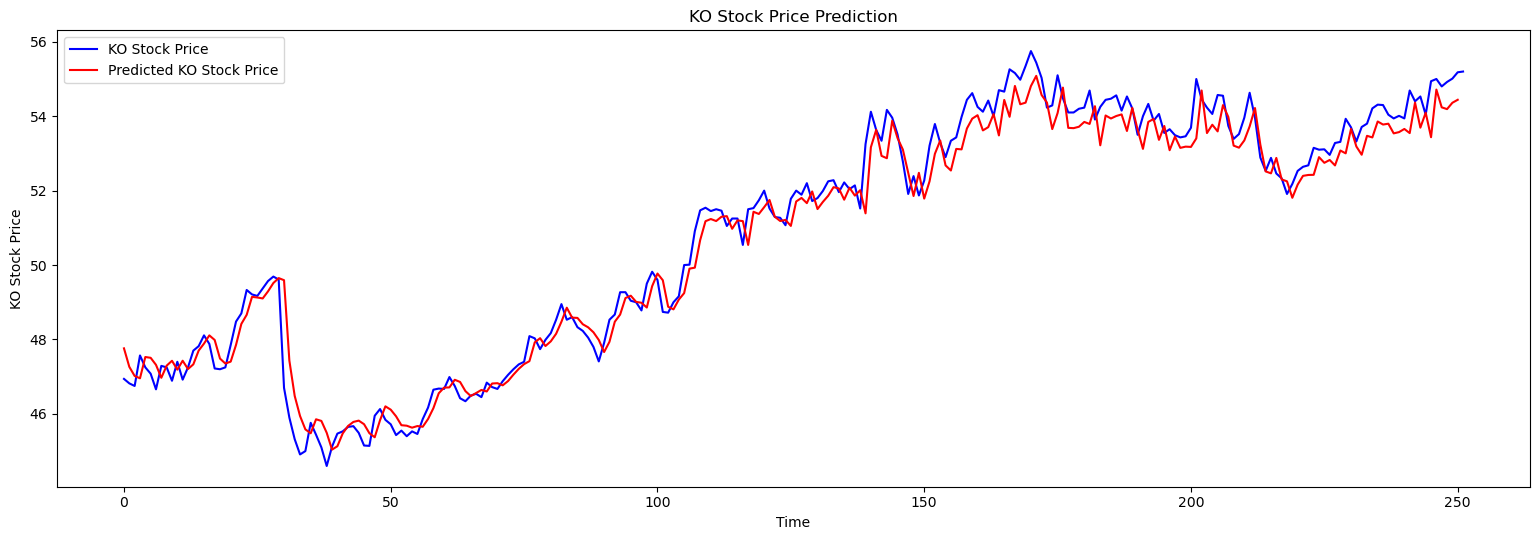

In [41]:
#Plots prediction and actual
real_stock_price= df_test.iloc[:, 1:2].values
plt.plot(real_stock_price, color = 'blue', label = 'KO Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted KO Stock Price')
plt.title('KO Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('KO Stock Price')
plt.legend()
plt.show()